<a href="https://colab.research.google.com/github/pchernic/Stocks_Quant_Analysis/blob/main/Python_for_Quantitative_Analysis_of_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Quantitative Analysis of Stocks.


Based on the article of AMAN KHARWAL

https://thecleverprogrammer.com/2024/01/15/quantitative-analysis-of-stock-market-using-python/

# Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Loading Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stocks.csv')
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


## Data Understanding.

In [3]:
df['Ticker'].value_counts()

AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: Ticker, dtype: int64

- In this dataset, we have four symbols and 62 observations of each of them.

Date Range

In [4]:
df['Date'].min()

'2023-02-07'

In [5]:
df['Date'].max()

'2023-05-05'

Our analysis will be perfomed using data from February to May of 2023.


## E.D.A

In [6]:
df['Close'].describe().transpose()

count    248.000000
mean     215.381674
std       91.461989
min       89.349998
25%      136.347498
50%      209.920006
75%      303.942505
max      366.829987
Name: Close, dtype: float64

As a portfolio, the stocks in the dataset range in a close price between 89.34 and 366.82 (USD)

- Mean is  215 and std is  91.46 (USD).

- 25% of the Close prices are <= $136.34.

- 50% <= $209.92.

- 75% <= $303.94.




### Close Price Distribution:

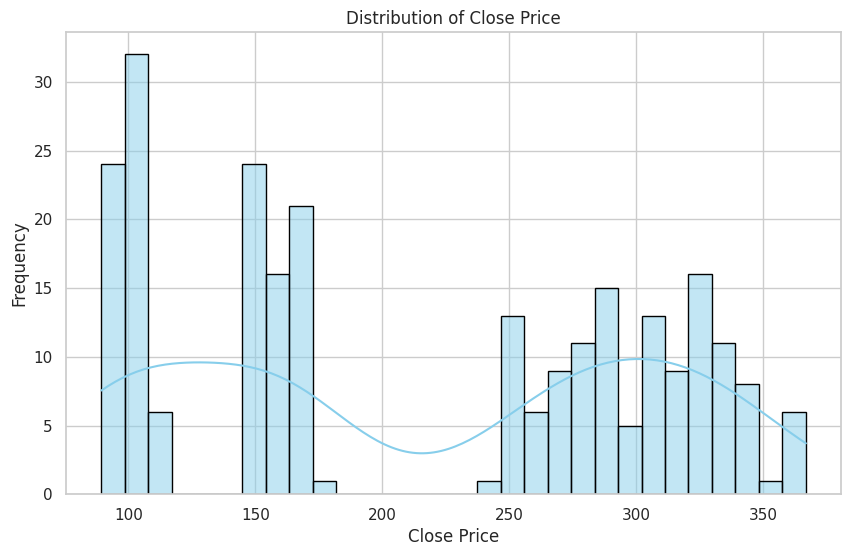

In [7]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plotting the distribution of "Close" price using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Descriptive analysis of each stock

In [8]:
descriptive = df.groupby('Ticker')['Close'].describe().transpose()
descriptive

Ticker,AAPL,GOOG,MSFT,NFLX
count,62.000000,62.000000,62.000000,62.000000
mean,158.240645,100.631532,275.039839,327.614677
std,7.360485,6.279464,17.676231,18.554419
min,145.309998,89.349998,246.270004,292.760010
25%,152.077499,94.702501,258.742500,315.672493
50%,158.055000,102.759998,275.810013,325.600006
75%,165.162506,105.962503,287.217506,338.899994
max,173.570007,109.459999,310.649994,366.829987



When we separate each stock's close prices using a group by Ticker, it's possible to extract insights into individual closing price behavior.

- **NFLX** has the highest standard deviation (std), indicating it is potentially a more volatile stock, followed by **MSFT**. In contrast, **AAPL** has the lowest standard deviation, suggesting it should be the least volatile stock in this dataset.

## Time Series Analysis

In [9]:
# Time Series Analysis
df['Date'] = pd.to_datetime(df['Date'])
pivot_data = df.pivot(index='Date', columns='Ticker', values='Close')

# Create a subplot
fig = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

# Show the plot
fig.show()

## Volatility Analysis

In [10]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the figure
fig.show()



- When visualizing our time series data, the discernible impact of higher standard deviation becomes evident. The price fluctuations observed in these stocks markedly exceed those witnessed in AAPL and GOOG.

## Moving Average Analysis



The provided code conducts a visual analysis of closing price trends utilizing moving averages and the rate of change. **Moving averages serve to mitigate short-term fluctuations,** while the **rate of change offers insights into the percentage change in prices from one day to the next**.

Such analyses represent common techniques within financial data analysis, serving to identify trends and patterns in stock prices effectively.

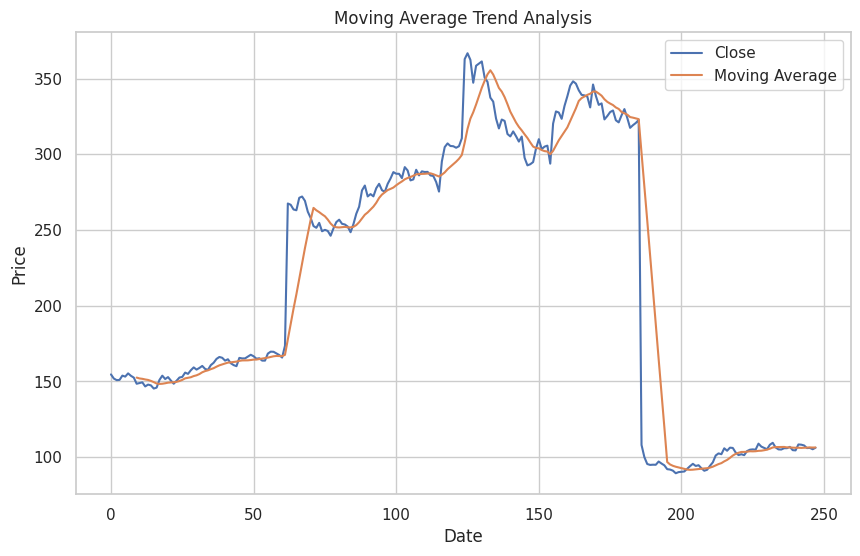

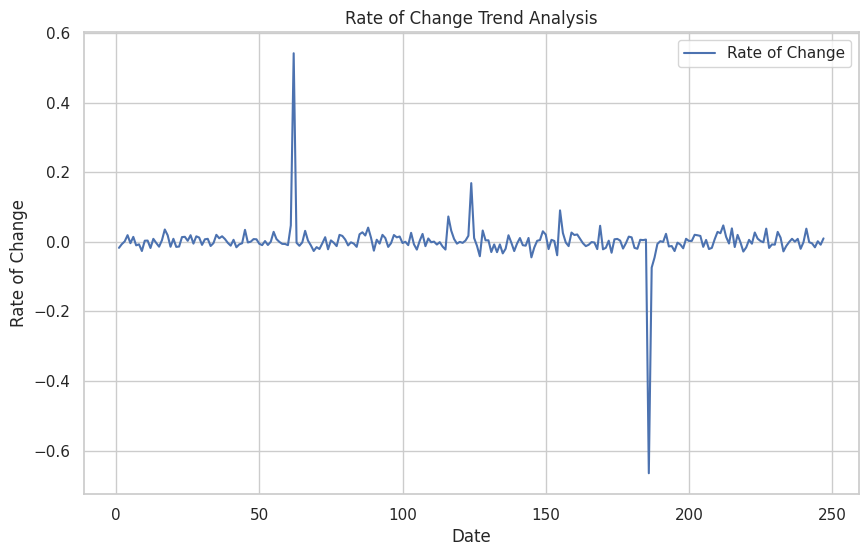

In [11]:

#1) Calculate the moving average
"""
Moving average of the "Close" prices
over a window of 10 days and stores the result in a new column named 'moving_average'
"""
df['moving_average'] = df['Close'].rolling(window=10).mean()

#2) Plot the closing price and moving average
"""
 Shows the original "Close" prices along with the calculated moving average.
 The x-axis represents dates, the y-axis represents prices,
 and the plot includes a legend to distinguish between
 the original closing prices and the moving average.
"""
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close')
plt.plot(df['moving_average'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Trend Analysis')
plt.legend()
plt.show()

#3) Calculate the rate of change
"""
 rate of change of the "Close" prices.
 It computes the percentage change from the previous day's closing price and stores the result
 in a new column named 'rate_of_change' in the DataFrame
"""
df['rate_of_change'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

# 4) Plot the rate of change
"""
The x-axis represents dates, the y-axis represents the rate of change,
and a legend is included to label the plot as the rate of change.
"""
plt.figure(figsize=(10, 6))
plt.plot(df['rate_of_change'], label='Rate of Change')
plt.xlabel('Date')
plt.ylabel('Rate of Change')
plt.title('Rate of Change Trend Analysis')
plt.legend()
plt.show()


### Individual Moving Average Analysis

<ipython-input-12-d443d3b7e0aa>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-d443d3b7e0aa>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



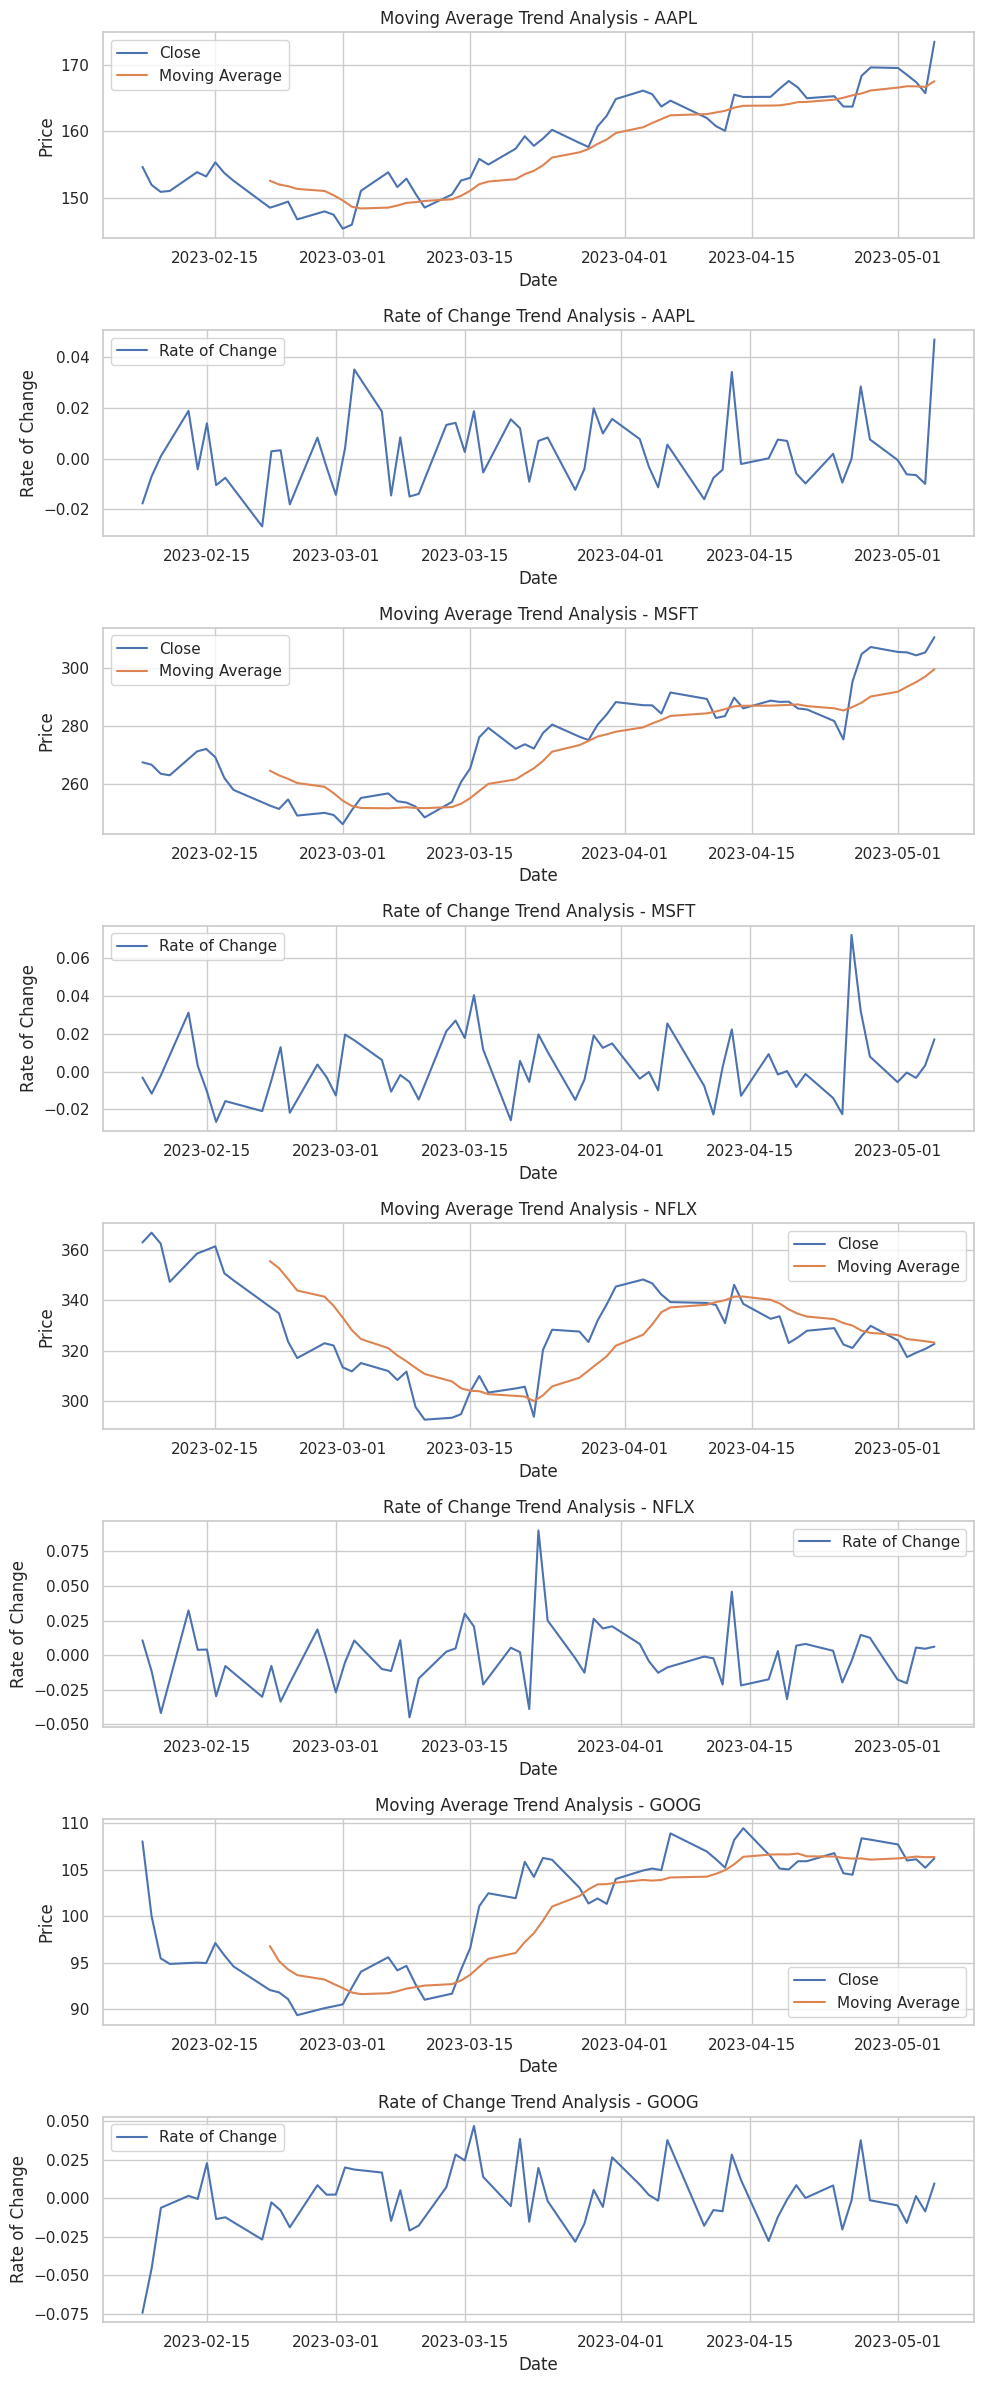

In [12]:


# Set the figure size for all subplots
fig, axes = plt.subplots(nrows=len(df['Ticker'].unique()) * 2, ncols=1, figsize=(10, 6 * len(df['Ticker'].unique())))

# Iterate over unique tickers in the dataset
for i, ticker in enumerate(df['Ticker'].unique()):
    # Subset the DataFrame for the current ticker
    subset_df = df[df['Ticker'] == ticker]

    # Calculate moving average
    subset_df['moving_average'] = subset_df['Close'].rolling(window=10).mean()

    # Plot closing price and moving average
    axes[i * 2].plot(subset_df['Date'], subset_df['Close'], label='Close')
    axes[i * 2].plot(subset_df['Date'], subset_df['moving_average'], label='Moving Average')
    axes[i * 2].set_xlabel('Date')
    axes[i * 2].set_ylabel('Price')
    axes[i * 2].set_title(f'Moving Average Trend Analysis - {ticker}')
    axes[i * 2].legend()

    # Calculate rate of change
    subset_df['rate_of_change'] = (subset_df['Close'] - subset_df['Close'].shift(1)) / subset_df['Close'].shift(1)

    # Plot rate of change
    axes[i * 2 + 1].plot(subset_df['Date'], subset_df['rate_of_change'], label='Rate of Change')
    axes[i * 2 + 1].set_xlabel('Date')
    axes[i * 2 + 1].set_ylabel('Rate of Change')
    axes[i * 2 + 1].set_title(f'Rate of Change Trend Analysis - {ticker}')
    axes[i * 2 + 1].legend()

# Adjust layout to add space between subplots
plt.tight_layout()
plt.show()


- This visualization evaluates the volatility of price changes over a specified window. High volatility suggests substantial price fluctuations, whereas low volatility suggests smaller and more stable price movements.

#  Correlation Analysis.

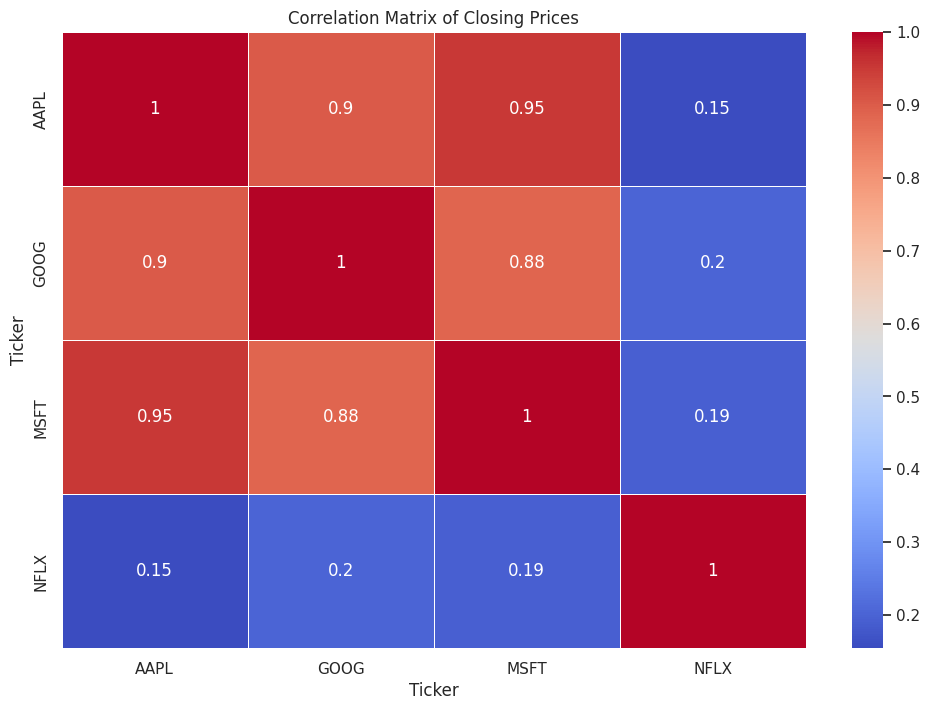

In [13]:
# Check if the 'Date' column is present, and select the relevant columns
if 'Date' in df.columns:
    subset_df = df[['Date', 'Ticker', 'Close']]
else:
    subset_df = df[['Ticker', 'Close']]

# Pivot the DataFrame to have Ticker as columns and Date as index
pivot_data = subset_df.pivot(index='Date', columns='Ticker', values='Close')

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

- It's particularly intriguing to observe the robust correlation among AAPL, GOOG, and MSFT.

- This correlation may present a heightened risk to investors, as a decline in the price of one stock could potentially lead to similar movements in the others.

- Conversely, an intriguing contrast lies in the weak correlation of NFLX with the other stocks. NFLX exhibits a notably lower correlation with all other stocks in this portfolio.

##Comparative Analysis

The code is conducting a comparative analysis of the performance of various stocks based on their returns over the specified period.

It calculates the **percentage change in closing prices** from the start to the end of the period for each stock.

In [14]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()



- MSFT emerged as the top performer in this portfolio, boasting a return slightly exceeding 15% over the period, followed closely by AAPL with a 12% return.

- Conversely, NFLX fared the poorest, experiencing a negative return of approximately 11%, while GOOG recorded a marginal decline of -1.69%.

##Daily Risk Vs. Return Analysis

Here's a refined version:

In this step, the code computes the average daily return and the standard deviation of daily returns individually, utilizing the **standard deviation** as a proxy for risk and the **average daily return** to represent the expected return.

In [15]:
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()

# Brazilian Stock Market Example


Now, the same analysis will be conducted for the top 10 market capitalization companies in Brazil.

## What are the top 10 stocks with the highest market capitalization in Brazil?

## Loading df

- This dataframe was downloaded from Ibovespa official website in feb 2nd.


In [34]:
file_path = '/content/drive/MyDrive/Colab Notebooks/ibov_jan24.xlsx'

df = pd.read_excel(file_path)


df


,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,ABEV3,AMBEV S/A,ON EJ,4394245879,2.637
1,ALOS3,ALLOS,ON NM,532616595,0.618
2,ALPA4,ALPARGATAS,PN N1,176733968,0.078
3,ARZZ3,AREZZO CO,ON NM,62305891,0.176
4,ASAI3,ASSAI,ON NM,1349217892,0.798
...,...,...,...,...,...
83,VBBR3,VIBRA,ON EJ NM,1114412532,1.109
84,VIVT3,TELEF BRASIL,ON EJ,423091712,0.988
85,WEGE3,WEG,ON EJ NM,1481593024,2.390
86,YDUQ3,YDUQS PART,ON NM,289347914,0.284


In [35]:

# Sort values by "Part. (%)" column in descending order
df = df.sort_values(by=['Part. (%)'],ascending=False)
df

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
87,Quantidade Teórica Total,NaN,NaN,96372098181,100.000
81,VALE3,VALE,ON NM,4196924316,14.160
59,PETR4,PETROBRAS,PN N2,4566445852,7.432
47,ITUB4,ITAUUNIBANCO,PN N1,4801593832,7.126
58,PETR3,PETROBRAS,ON N2,2379877655,4.054
...,...,...,...,...,...
41,GOLL4,GOL,PN N2,198184909,0.078
37,EZTC3,EZTEC,ON NM,91514307,0.075
60,PETZ3,PETZ,ON NM,309729428,0.053
12,BHIA3,CASAS BAHIA,ON NM,94843047,0.047


In [36]:
#dropping "Quantidade Total"
df = df.drop(87)
df

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
81,VALE3,VALE,ON NM,4196924316,14.160
59,PETR4,PETROBRAS,PN N2,4566445852,7.432
47,ITUB4,ITAUUNIBANCO,PN N1,4801593832,7.126
58,PETR3,PETROBRAS,ON N2,2379877655,4.054
9,BBDC4,BRADESCO,PN EJ N1,5146576868,3.844
...,...,...,...,...,...
41,GOLL4,GOL,PN N2,198184909,0.078
37,EZTC3,EZTEC,ON NM,91514307,0.075
60,PETZ3,PETZ,ON NM,309729428,0.053
12,BHIA3,CASAS BAHIA,ON NM,94843047,0.047


In [39]:
# Visualizing the top 20 stocks in Market Share (Part. (%))
top10 = df.head(10)
top10

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
81,VALE3,VALE,ON NM,4196924316,14.160
59,PETR4,PETROBRAS,PN N2,4566445852,7.432
47,ITUB4,ITAUUNIBANCO,PN N1,4801593832,7.126
58,PETR3,PETROBRAS,ON N2,2379877655,4.054
9,BBDC4,BRADESCO,PN EJ N1,5146576868,3.844
31,ELET3,ELETROBRAS,ON N1,1980568384,3.673
6,B3SA3,B3,ON NM,5602790110,3.540
7,BBAS3,BRASIL,ON NM,1420949112,3.440
0,ABEV3,AMBEV S/A,ON EJ,4394245879,2.637
46,ITSA4,ITAUSA,PN EJ N1,5372783971,2.435


## Top 10 Brazilian Stocks in Ibov by Market share

In [42]:
pip install squarify


<ipython-input-49-959ba001191c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-959ba001191c>:10: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



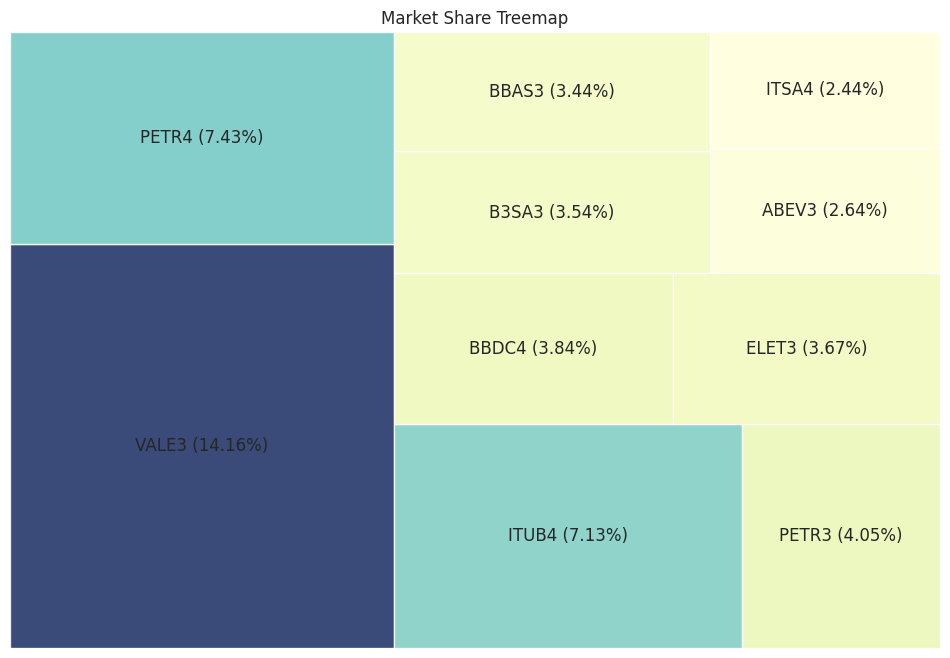

In [49]:
import squarify
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Calculate the size of each rectangle in the treemap based on market share
top10['size'] = top10['Part. (%)'] * 1000  # Multiplying by 1000 for better visualization

# Define a custom colormap ranging from green to blue
color_map = cm.get_cmap('YlGnBu')  # Choosing a colormap from yellow to green to blue

# Normalize the Part (%) values to range between 0 and 1
norm = Normalize(vmin=top10['Part. (%)'].min(), vmax=top10['Part. (%)'].max())

# Plotting the treemap with labels and custom colors
plt.figure(figsize=(12, 8))
squarify.plot(sizes=top10['size'], label=top10.apply(lambda x: f"{x['Código']} ({x['Part. (%)']:.2f}%)", axis=1),
              alpha=0.8, color=color_map(norm(top10['Part. (%)'])))
plt.axis('off')
plt.title('Market Share Treemap')
plt.show()


## Getting Top10 stocks data from yfinance.

In [50]:
top10['Código']

81    VALE3
59    PETR4
47    ITUB4
58    PETR3
9     BBDC4
31    ELET3
6     B3SA3
7     BBAS3
0     ABEV3
46    ITSA4
Name: Código, dtype: object

In [64]:
import yfinance as yf

# Define the list of stocks with 'Adj Close' appended
stocks = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'PETR3.SA', 'BBDC4.SA', 'ELET3.SA', 'B3SA3.SA', 'BBAS3.SA', 'ABEV3.SA', 'ITSA4.SA']

# Define the start and end dates as strings in 'YYYY-MM-DD' format
start = '2023-01-01'
end = '2023-12-31'

# Download the Adj Close data for the specified stocks and time period
df = yf.download(stocks, start=start, end=end)['Close']

df


[*********************100%%**********************]  10 of 10 completed


Ticker,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,ELET3.SA,ITSA4.SA,ITUB4.SA,PETR3.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,,,
2023-01-02,14.19,12.25,33.259998,14.750000,40.590000,7.928372,24.490000,26.170000,22.920000,89.400002
2023-01-03,14.17,11.84,32.639999,14.000000,39.830002,7.729215,23.980000,25.799999,22.340000,89.239998
2023-01-04,14.25,11.93,33.060001,14.040000,40.900002,7.795600,24.049999,26.230000,23.049999,89.400002
2023-01-05,14.29,12.30,34.570000,14.650000,40.980000,7.909405,24.799999,27.080000,23.879999,90.900002
2023-01-06,14.32,12.59,35.049999,15.060000,41.000000,8.042177,25.230000,26.910000,23.740000,92.339996
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,13.70,14.49,54.290001,17.270000,41.599998,10.100000,32.790001,38.110001,36.389999,76.970001
2023-12-22,13.71,14.51,54.439999,16.830000,41.970001,10.250000,33.310001,38.619999,36.740002,76.389999
2023-12-26,13.77,14.66,54.939999,16.879999,42.090000,10.280000,33.650002,39.200001,37.330002,76.660004


## Data Wrangling.

In [67]:
# Reset index to move 'Date' to a column
df_reset = df.reset_index()

# Melt the DataFrame to reshape it
df = df_reset.melt(id_vars='Date', var_name='Ticker', value_name='Close')

# Display the resulting DataFrame
df


,Date,Ticker,Close
0,2023-01-02,ABEV3.SA,14.190000
1,2023-01-03,ABEV3.SA,14.170000
2,2023-01-04,ABEV3.SA,14.250000
3,2023-01-05,ABEV3.SA,14.290000
4,2023-01-06,ABEV3.SA,14.320000
...,...,...,...
2475,2023-12-21,VALE3.SA,76.970001
2476,2023-12-22,VALE3.SA,76.389999
2477,2023-12-26,VALE3.SA,76.660004
2478,2023-12-27,VALE3.SA,77.400002



## Descriptive Analysis

In [77]:
descriptive = df.groupby('Ticker')['Close'].describe().transpose()
descriptive

Ticker,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,ELET3.SA,ITSA4.SA,ITUB4.SA,PETR3.SA,PETR4.SA,VALE3.SA
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,14.036250,12.846129,45.492661,14.999718,36.961089,8.640409,27.326774,32.748347,29.688710,73.992460
std,0.733029,1.311662,5.232899,1.258054,2.965917,0.673174,2.246340,4.246322,4.429470,9.400152
min,12.290000,10.350000,32.639999,12.570000,30.530001,7.378318,23.150000,25.340000,22.340000,61.049999
25%,13.462500,11.755000,40.782501,13.967500,34.664999,8.146497,25.797500,29.020000,25.777501,67.079998
50%,14.165000,12.920000,47.000000,14.935000,36.439999,8.562842,27.090000,33.160000,29.665000,70.040001
75%,14.592500,14.027500,49.067499,16.160000,39.470001,9.135173,28.452500,36.737499,33.985001,79.757502
max,15.550000,15.220000,55.389999,17.549999,42.750000,10.370000,33.970001,41.560001,38.520000,98.000000


## Visualizing Std

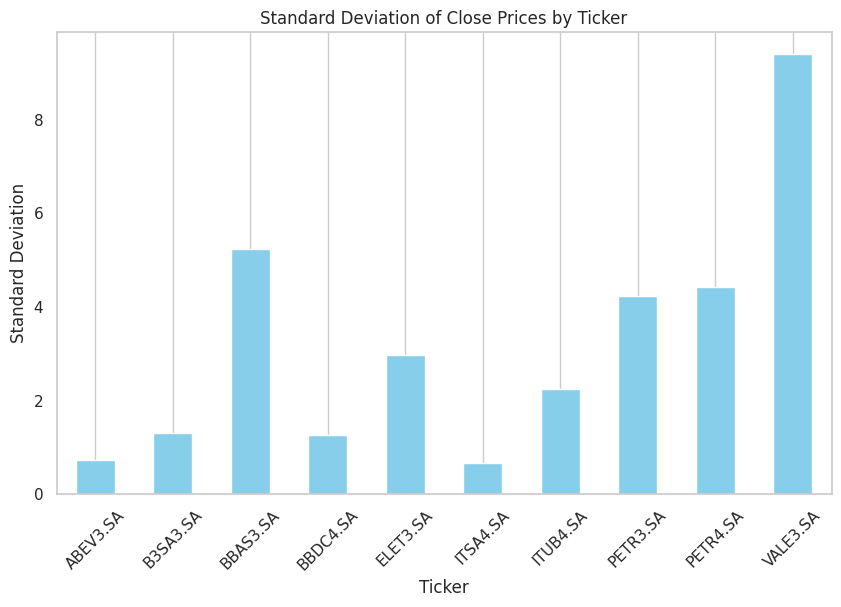

In [78]:
import matplotlib.pyplot as plt

# Extract the 'std' row from the descriptive statistics DataFrame
std_values = descriptive.loc['std']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
std_values.plot(kind='bar', color='skyblue')
plt.title('Standard Deviation of Close Prices by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Based on this plot, we can expect VALE3.SA to be the most volatile stock among the top 10 IBOVESPA companies.

We will perform a time series analysis to confirm this observation

## Time Series Analysis

In [68]:
# Time Series Analysis
df['Date'] = pd.to_datetime(df['Date'])
pivot_data = df.pivot(index='Date', columns='Ticker', values='Close')

# Create a subplot
fig = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

# Show the plot
fig.show()

## Moving Averages Analysis.

## Individual Moving Averages Visualization


<ipython-input-73-d443d3b7e0aa>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-d443d3b7e0aa>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



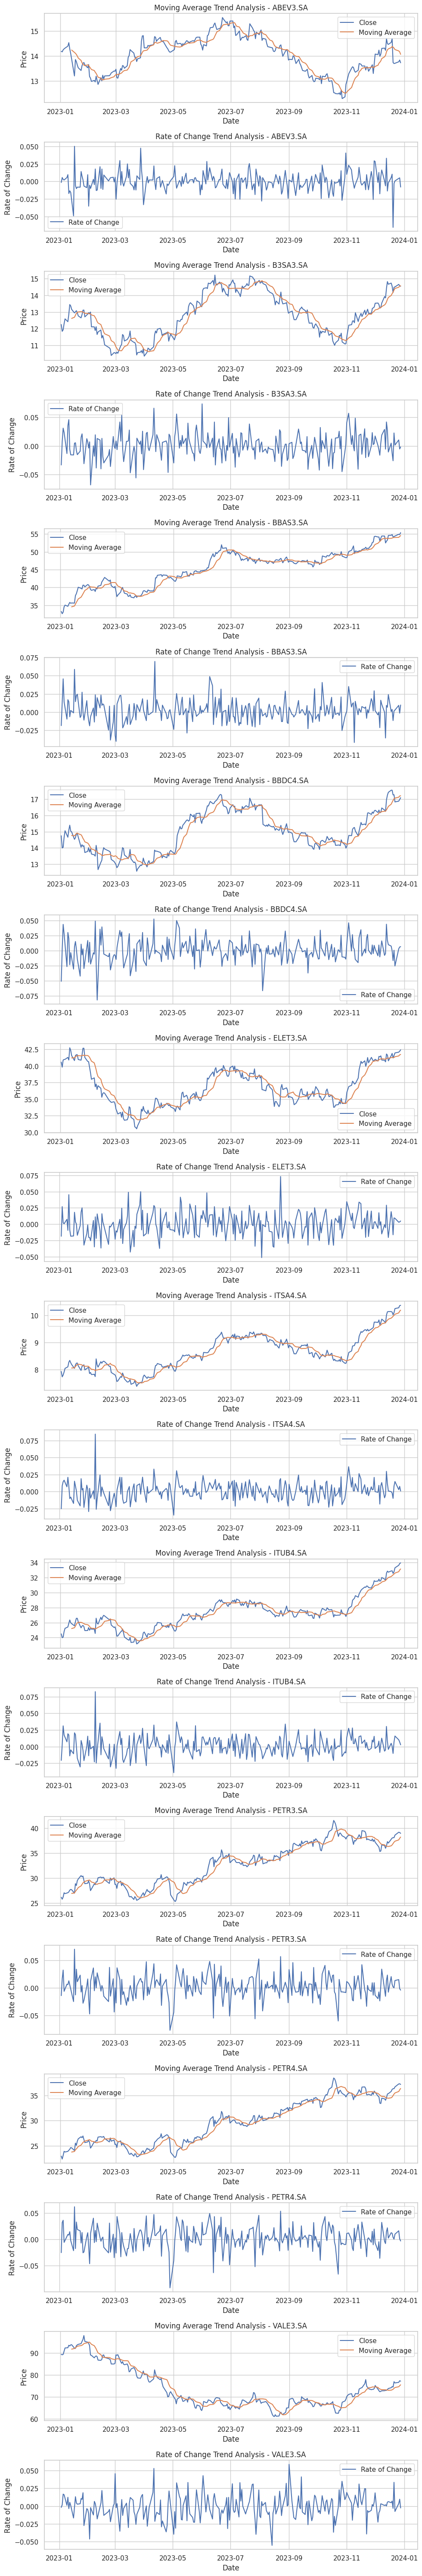

In [73]:


# Set the figure size for all subplots
fig, axes = plt.subplots(nrows=len(df['Ticker'].unique()) * 2, ncols=1, figsize=(10, 6 * len(df['Ticker'].unique())))

# Iterate over unique tickers in the dataset
for i, ticker in enumerate(df['Ticker'].unique()):
    # Subset the DataFrame for the current ticker
    subset_df = df[df['Ticker'] == ticker]

    # Calculate moving average
    subset_df['moving_average'] = subset_df['Close'].rolling(window=10).mean()

    # Plot closing price and moving average
    axes[i * 2].plot(subset_df['Date'], subset_df['Close'], label='Close')
    axes[i * 2].plot(subset_df['Date'], subset_df['moving_average'], label='Moving Average')
    axes[i * 2].set_xlabel('Date')
    axes[i * 2].set_ylabel('Price')
    axes[i * 2].set_title(f'Moving Average Trend Analysis - {ticker}')
    axes[i * 2].legend()

    # Calculate rate of change
    subset_df['rate_of_change'] = (subset_df['Close'] - subset_df['Close'].shift(1)) / subset_df['Close'].shift(1)

    # Plot rate of change
    axes[i * 2 + 1].plot(subset_df['Date'], subset_df['rate_of_change'], label='Rate of Change')
    axes[i * 2 + 1].set_xlabel('Date')
    axes[i * 2 + 1].set_ylabel('Rate of Change')
    axes[i * 2 + 1].set_title(f'Rate of Change Trend Analysis - {ticker}')
    axes[i * 2 + 1].legend()

# Adjust layout to add space between subplots
plt.tight_layout()
plt.show()


## Correlation Analysis

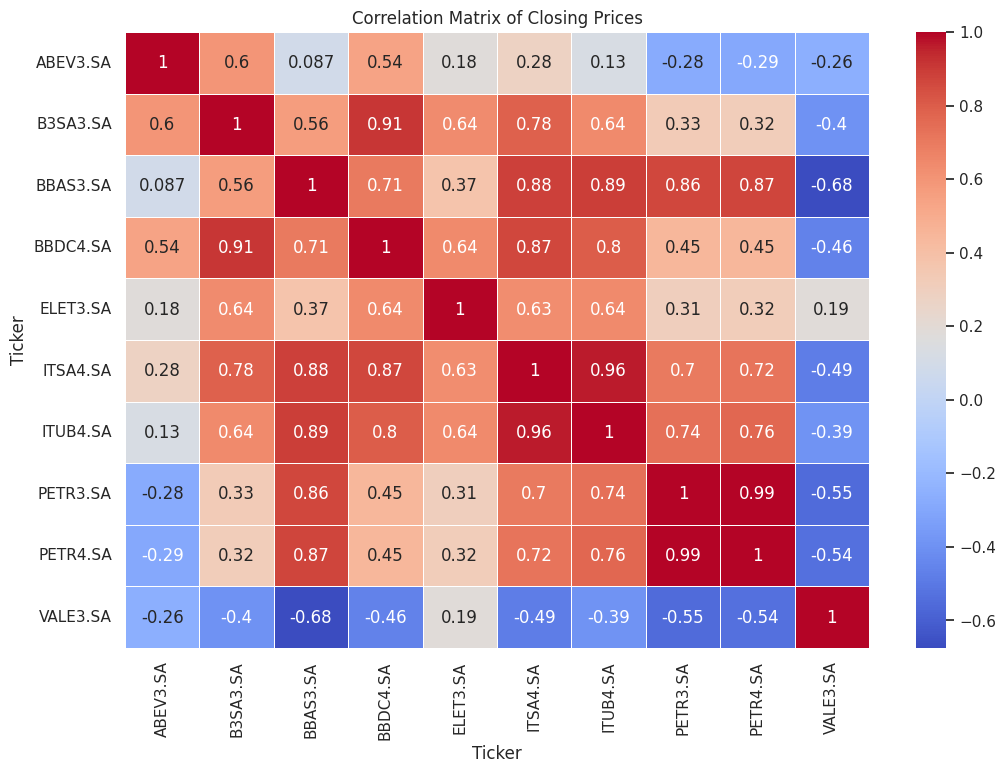

In [74]:
# Check if the 'Date' column is present, and select the relevant columns
if 'Date' in df.columns:
    subset_df = df[['Date', 'Ticker', 'Close']]
else:
    subset_df = df[['Ticker', 'Close']]

# Pivot the DataFrame to have Ticker as columns and Date as index
pivot_data = subset_df.pivot(index='Date', columns='Ticker', values='Close')

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Closing Prices')
plt.show()



Based on this heatmap plot, we can draw some insights:

- Some stocks exhibit a relatively strong positive correlation. This is especially evident in PN and ON stocks of the same companies, but different companies also display a strong correlation. This tendency is more common among companies within the same sector, such as banks, which was expected.

- It's also interesting to note how VALE3.SA, the largest company in terms of market share within the IBOVESPA index, has a negative correlation with almost every other stock in this portfolio. This may represent an advantage in terms of risk management.


## Return analysis

The code is calculating the **percentage change** in closing prices from the start to the end of the period for each stock:

In [75]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()



"BBAS3.SA and PETR4.SA were the stocks with the best performance in 2023 within this portfolio. Their correlation was 0.87, and their yearly return was quite similar as well. This observation reinforces the strength of their correlation."

## Risk Return Analysis.

The code calculates the **average daily return and the standard deviation of daily returns individually**, considering **standard deviation as a proxy for risk** and the **average daily return representing the expected return.**

In [76]:
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()